<a href="https://colab.research.google.com/github/Prog19/unsupervised-customer_segmentation/blob/master/unsupervised-customer_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning: Customer Segmentation**

# Libraries

In [ ]:
from IPython.display import clear_output
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import silhouette_score
'''# To enable interactivity you need to use the notebook backend of matplotlib. #doesn't work
%matplotlib inline  
%matplotlib notebook
%pylab'''
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.graph_objs as go
import scipy.cluster.hierarchy as sch
from itertools import product

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised/data/Mall_Customers.csv')
data.columns
X = data[['Age', 'Annual_Income_(k$)', 'Spending_Score']].iloc[: , :].values

# k-Means

## Prep

In [ ]:
# k-Means is not applicable to categorical variables
inertia = []
s_scores = []
for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', tol=0.0001,  random_state= 111, algorithm='elkan'))
    algorithm.fit(X)
    inertia.append(algorithm.inertia_) # Create groups of equal variance (minimizing inertia)
    silhouette_avg = silhouette_score(X, algorithm.labels_)
    s_scores.append(silhouette_avg)

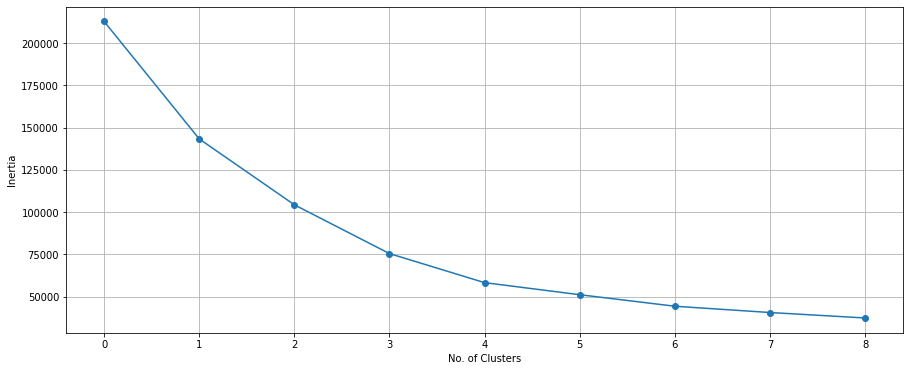

In [ ]:
# Elbow Chart
plt.figure(figsize = (15, 6))
plt.plot(inertia , 'o-')
plt.xlabel('No. of Clusters') , plt.ylabel('Inertia')
plt.grid()
plt.show()
# Optimal no. of clusters could be 5 or 6.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



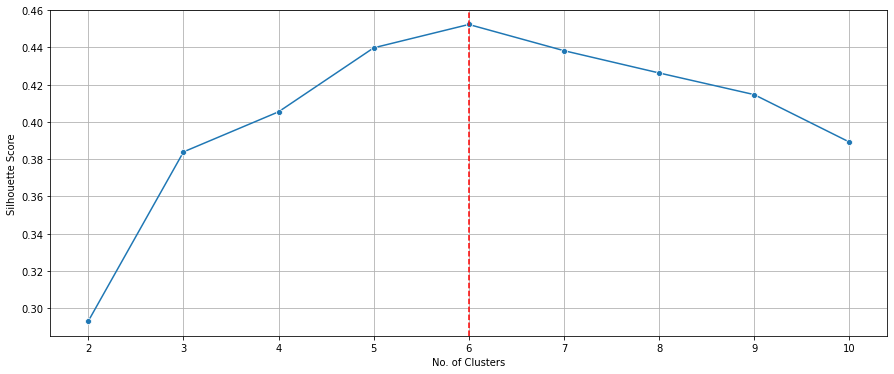

In [ ]:
# Silhouette score that measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.lineplot(np.arange(2 , 11), s_scores, marker='o', ax=ax)
ax.set_xlabel("No. of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()
# Optimal no. of clusters is 6.

## Model

In [ ]:
# For clusters of k=6
KM6 = (KMeans(n_clusters = 6, init='k-means++', tol=0.0001,  random_state= 111, algorithm='elkan'))
KM6.fit(X)
labels6 = KM6.labels_
centroids6 = KM6.cluster_centers_
KM6_df = data.copy()
KM6_df['labels'] = labels6
KM6_df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score',
       'labels'],
      dtype='object')

In [ ]:
def eval(df):
    clust_sizes = df.groupby('labels').size().to_frame()
    clust_sizes.columns = ["cluster size"]
    print(clust_sizes)

eval(KM6_df)

        cluster size
labels              
0                 38
1                 35
2                 45
3                 39
4                 21
5                 22


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


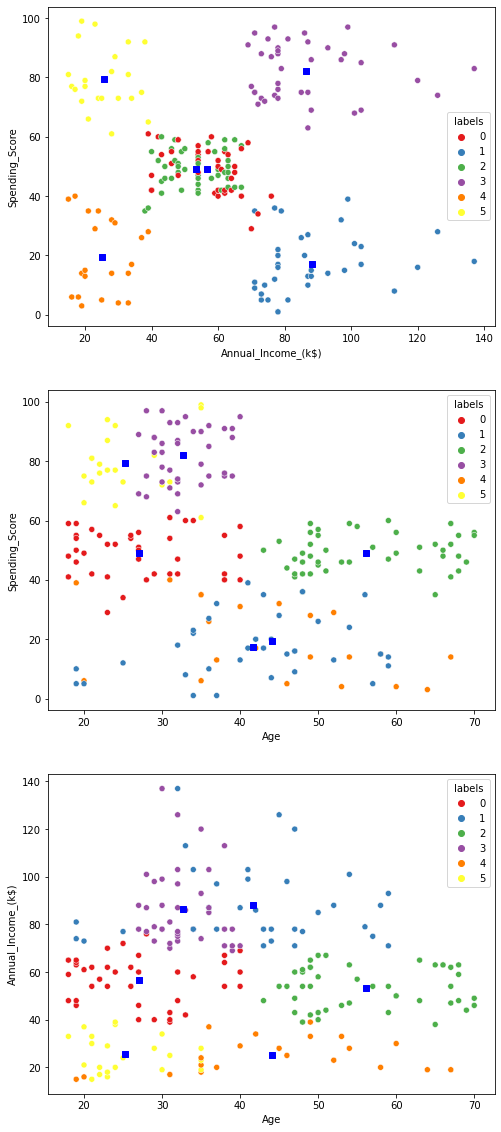

In [ ]:
def model_plot_2d(df):
    fig, (axes) = plt.subplots(3,1,figsize=(8,20))
    scat_1 = sns.scatterplot('Annual_Income_(k$)', 'Spending_Score', data=df,
                    hue='labels', ax=axes[0], palette='Set1', legend='full')
    scat_2 = sns.scatterplot('Age', 'Spending_Score', data=df,
                    hue='labels', palette='Set1', ax=axes[1], legend='full')
    scat_2 = sns.scatterplot('Age', 'Annual_Income_(k$)', data=df,
                    hue='labels', palette='Set1', ax=axes[2], legend='full')
    axes[0].scatter(centroids6[:,1],centroids6[:,2], marker='s', s=40, c="blue")
    axes[1].scatter(centroids6[:,0],centroids6[:,2], marker='s', s=40, c="blue")
    axes[2].scatter(centroids6[:,0],centroids6[:,1], marker='s', s=40, c="blue")
    plt.show()

model_plot_2d(KM6_df)

In [ ]:
def model_plot_3d(df):
    # doesn't rotate
    '''#ax = plt.axes(projection='3d') # default 
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)
    ax.scatter(df['Age'],
              df['Annual_Income_(k$)'],
              df['Spending_Score'],
              c=df['labels'],
              s=30)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score')
    ax.set_title('3D view of K-Means 6 clusters')
    ax.dist = 10
    plt.show()'''

    # rotates interactively
    def tracer(db, n, name):
        return go.Scatter3d(
            x = db[db['labels']==n]['Age'],
            y = db[db['labels']==n]['Spending_Score'],
            z = db[db['labels']==n]['Annual_Income_(k$)'],
            mode = 'markers',
            name = name
        )
        
    trace0 = tracer(df, 0, 'Cluster 0')
    trace1 = tracer(df, 1, 'Cluster 1')
    trace2 = tracer(df, 2, 'Cluster 2')
    trace3 = tracer(df, 3, 'Cluster 3')
    trace4 = tracer(df, 4, 'Cluster 4')
    trace5 = tracer(df, 5, 'Cluster 5')

    trace_data = [trace0, trace1, trace2, trace3, trace4, trace5]

    layout = go.Layout(
        title = '3D view of K-Means 6 clusters',
        scene = dict(
                xaxis = dict(title = 'Age'),
                yaxis = dict(title = 'Spending Score'),
                zaxis = dict(title = 'Annual Income')
            )
    )

    fig = go.Figure(data=trace_data, layout=layout)
    py.offline.iplot(fig)

model_plot_3d(KM6_df)

# Hierarchial

## Prep

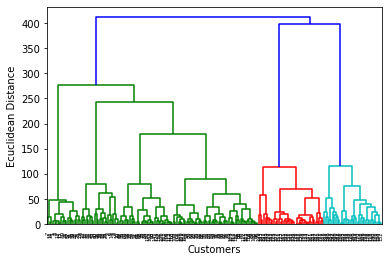

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()
# Optimal no. of clusters is 5.

## Model

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc.fit(X)
hc_df = data.copy()
hc_df['labels'] = hc.labels_

In [ ]:
eval(hc_df)

        cluster size
labels              
0                 83
1                 35
2                 39
3                 20
4                 23


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



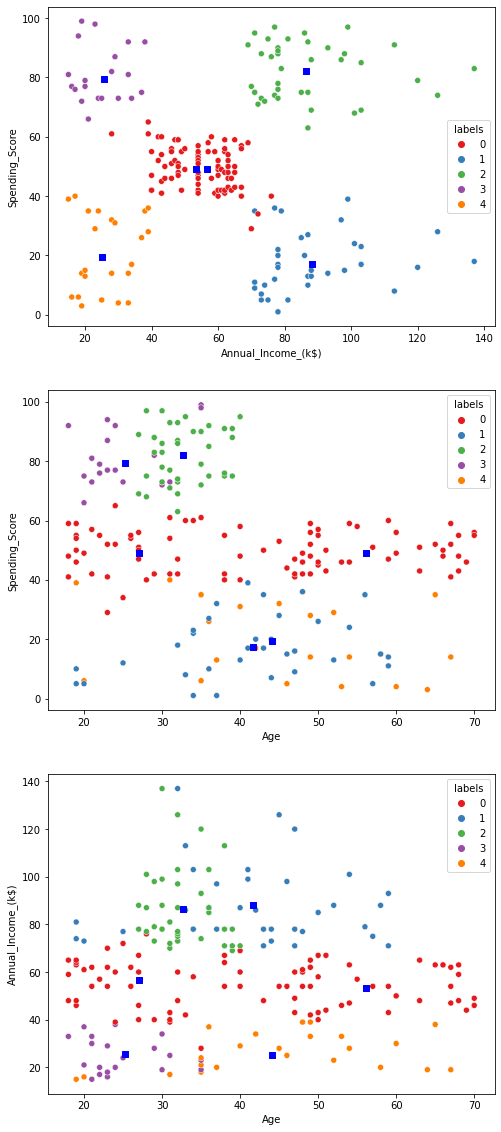

In [ ]:
model_plot_2d(hc_df)

In [ ]:
model_plot_3d(hc_df)

# DBSCAN

## Prep

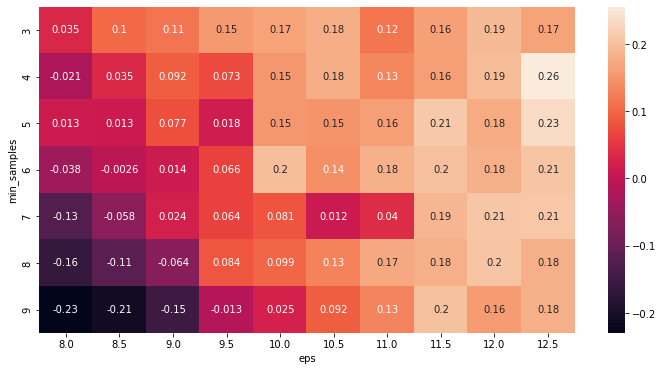

In [ ]:
eps_values = np.arange(8,13,0.5) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))# creates a mxn combinations of eps and min values
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    dbs = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(dbs.labels_)))
    sil_score.append(silhouette_score(X, dbs.labels_))
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['eps', 'min_samples'])   
tmp['no_of_clusters'] = no_of_clusters
tmp['sil_score'] = sil_score

pivot = pd.pivot_table(tmp, values='sil_score', index='min_samples', columns='eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot, annot=True, ax=ax)
plt.show()
# Optimal eps= is 12.5 & min_samples is 4.

## Model

In [ ]:
dbs = DBSCAN(eps=12.5, min_samples=4).fit(X)
dbs_df = data.copy()
dbs_df['labels'] = dbs.labels_

In [ ]:
eval(dbs_df) # outliers/noise is labelled -1 

        cluster size
labels              
-1                18
 0               112
 1                 8
 2                34
 3                24
 4                 4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



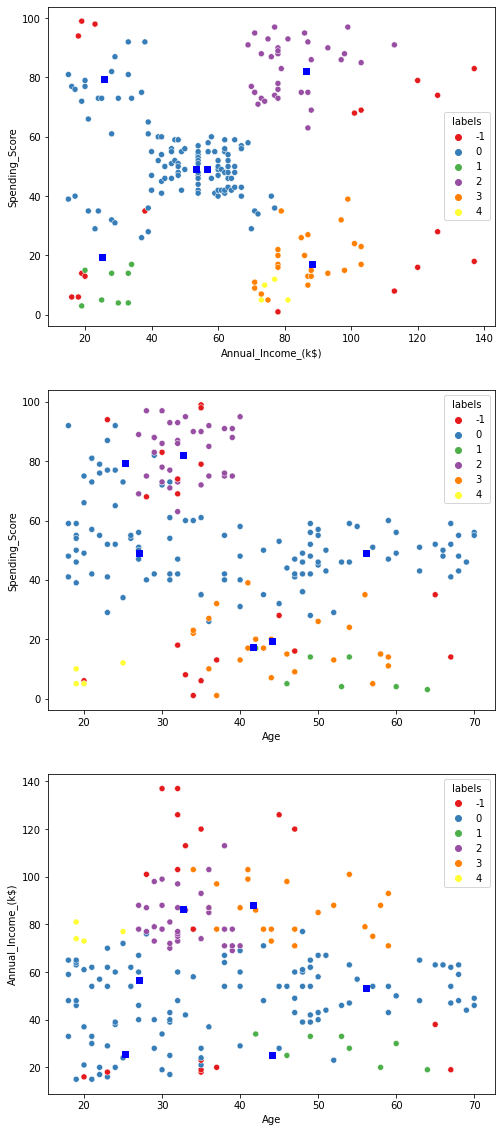

In [ ]:
model_plot_2d(dbs_df)

In [ ]:
model_plot_3d(dbs_df)

# Affinity Propagation

## Prep

In [ ]:
no_of_clusters = []
preferences = range(-20000,-500,200)
s_scores = [] # silouette scores

for p in preferences:
    af = AffinityPropagation(preference=p, max_iter=200).fit(X)
    no_of_clusters.append((len(np.unique(af.labels_))))
    s_scores.append(silhouette_score(X, af.labels_))
    
af_results = pd.DataFrame([preferences, no_of_clusters, s_scores], index=['preference','clusters', 's_score']).T
af_results.sort_values(by=['s_score','preference'], ascending=False).head(10)

,preference,clusters,s_score
41,-11800.0,6.0,0.451649
68,-6400.0,6.0,0.451440
64,-7200.0,6.0,0.451440
63,-7400.0,6.0,0.451440
55,-9000.0,6.0,0.451440
47,-10600.0,6.0,0.451440
46,-10800.0,6.0,0.451440
35,-13000.0,6.0,0.451440
33,-13400.0,6.0,0.451440
32,-13600.0,6.0,0.451440


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



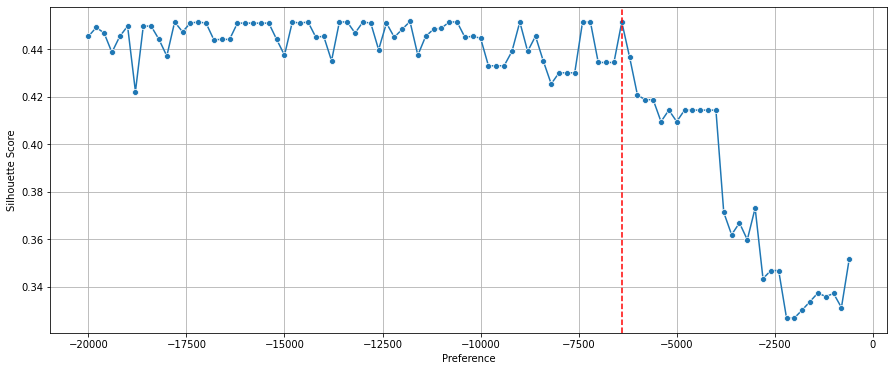

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.lineplot(preferences, s_scores, marker='o', ax=ax)
ax.set_xlabel("Preference")
ax.set_ylabel("Silhouette Score")
ax.axvline(-6400, ls="--", c="red")
plt.grid()
plt.show()
# Optimal preference is -6400.

## Model

In [ ]:
af = AffinityPropagation(preference=-6400, max_iter=200).fit(X)
af_df = data.copy()
af_df['labels'] = af.labels_ 

In [ ]:
eval(af_df)

        cluster size
labels              
0                 23
1                 22
2                 44
3                 37
4                 35
5                 39


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



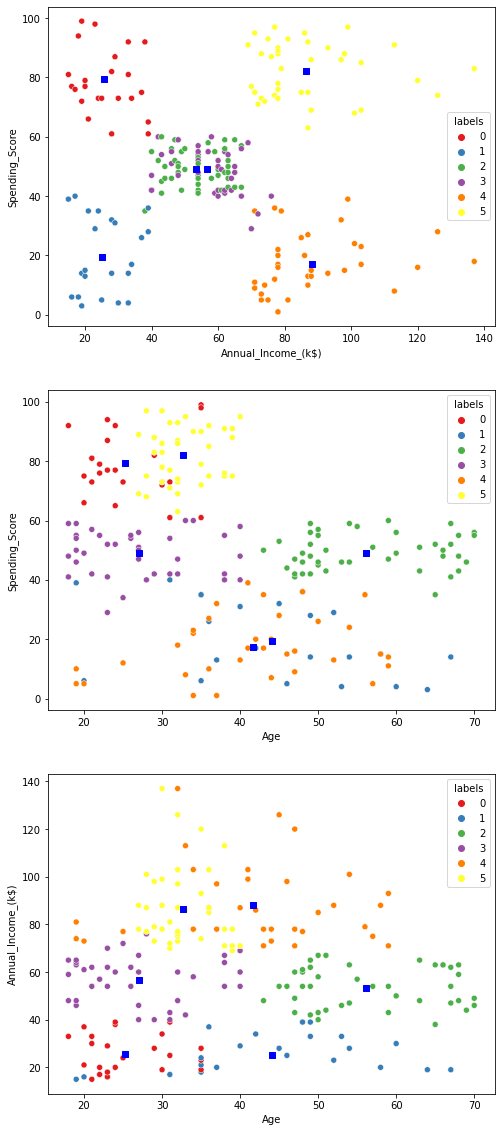

In [ ]:
model_plot_2d(af_df)

In [ ]:
model_plot_3d(af_df)